## Introduction

The aim of this tutorial is to introduce the reader to some interesting methods for representing tabular data with the Seaborn Librabry as well as using a new data set, focusing on formula one racing statistics and cleaning it using Pandas. 

Formula One (also Formula 1 or F1 and officially the FIA Formula One World Championship) is the highest class of single-seat auto racing that is sanctioned by the Fédération Internationale de l'Automobile (FIA). The FIA Formula One World Championship has been the premier form of racing around the world since its inaugural season in 1950.

By its nature, formula one is a very datadriven sport. Teams such as Ferrari, Mercedes or McLaren try and extract every millisecond of performance out of the cars that they build and this requires extensive data analysis. An average car outputs more than 2TB of data during each race weekend just from its onboard sensors alone. Apart from the car itself, teams also generate a lot of the data from their simulators, pit-stratergy models, mechanical/aerodynamic testing etc.
The race organizers have also been recording a lot of information about these cars for every race since the begining. This includes timing data (qualifying/lap times), pit stop information, starting/finishing order, points scored etc.
As each team (or constructor) designs and builds their car from scratch (according to a set of rules) and each race involves a lot of stratergy from pit stops to car setup; there are a lot of variables that go into making a succesful race campaign. Everything from driver performance, tyres and overtaking moves to weather conditions have a huge impact on the outcome. 

Shown below is a typical image of the system that the Mercedes AMG Petronas F1 Racing team uses for their race stratergy decisions (click to view the interactive chart) :

[<img src="https://blog.purestorage.com/wp-content/uploads/2016/07/Pure-MBF1-Pitwall-v6.jpg">](https://www.purepitwall.com/purepitwall/)



Therefore statistics are an important part of the sport for the organizers, teams as well as the viewers. 
Visuallizing data about the drivers, cars, races etc. tells us a great deal about some question we are interested in such as- 

Are today's cars more spread out in terms of performance (fastest vs slowest teams) than they were in the previous years ?

Have the nature of retirements (say engine failures vs mechanical faiulres) changed over the years ?

Which drivers are consistantly faster than their teammates over the season if you account for DNFs (Did Not Finish), penalties and reliability?

The governing body (FiA) and commercial rights holders have been increasing the amount of statistics and graphics that they present to the viewers over the years but there are still a lot of oppportunities to present insightful graphs particularly for data from the earlier decades when very limited work was done to prepare statistics.

This [dataset]( http://ergast.com/mrd/) contains data from 1950 all the way through the current 2019 season, and consists of tables describing constructors, race drivers, lap times, pit stops and more. 


### Contents

The data has been collected as excel sheets from http://ergast.com/mrd/ at the conclusion of the previous race held in Japan last weekend (10/11 to 10/13). The data was originally gathered and published to the public domain by Chris Newell who also created an API for the data.

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

The following topics have been covered in the tutorial-

- [Installing the libraries](#Installing-the-libraries)
- [Loading data and cleaning](#Loading-data-and-cleaning)
- [Line Plots](#Championship-Title-Fights-using-Annotated-Line-Graphs)
- [Violin Plots](#Racegrid-distribution-based-on-fastest-lap-pace-using-Violin-plots)
- [Stacked Bar Plots](#Coordinate-reference-systems)



## Installing the libraries

Before getting started, the various libraries are used need to be installed. Numpy, Matplotlib seaborn and pandas can be installed using  `pip`:

    $pip install numpy
    
    $pip install pandas
    
    $pip install seaborn
     


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

## Loading / Cleaning Data

Now that the libraries have been installed, the data needs to be loaded as dataframes. Using pandas to do this offers a lot advantages and makes it easy to manipulate the data.

The files can be downloaded from http://ergast.com/mrd/db#csv. This consists of 13 csv files with various information - 
circuits.csv (9 columns), constructorResults.csv (5 columns), constructors.csv (5 columns), constructorStandings.csv (7 columns) , drivers.csv(9columns), driverStandings.csv (7 columns), lapTimes.csv (6 columns), pitStops.csv (7 columns), qualifying.csv (9 columns), races.csv (8 columns), results.csv (18 columns), seasons.csv (2columns), status.csv (2 columns).

The data is isn't organized too well. The different races, drivers, constructors, results etc. are given in terms of a numerical id, the correct form of which is given in a separate list. The results aren't ordered properly which makes it important to understand these ids and there is a lot of missing data which isn't properly labelled.

Five of the aformentoined csv files are used along with the relavent columns-



In [2]:
#Loading the CSV files
resultsdf=pd.read_csv('results.csv')
racesdf=pd.read_csv('races.csv')
driverdf=pd.read_csv('driver.csv')
qualidf=pd.read_csv('qualifying.csv')
pitstopdf=pd.read_csv('pit_stops.csv')
status=pd.read_csv('status.csv')

#Creating dataframes with the relavent columns
df5=pitstopdf[['raceid','driverid','stop','duration']]
df4=qualidf[['raceid','driverid','position','q1','q3','q2']]
df3=driverdf[['driverid','driverref','forename','surname']]
df2=racesdf[['raceid','year','name']]
df1=resultsdf[['raceid','driverid','points','fastestlapspeed','statusid','constructorid','position']]

#Adding a column for the year in the results dataframe
d=dict(zip(df2.raceid,df2.year))
df1['year']=df1['raceid']
df1['year'].replace(d,inplace=True)
df5['year']=df5['raceid']
df5['year'].replace(d,inplace=True)

#Adding a column for driver name or reference
d=dict(zip(df3.driverid,df3.driverref))
df1['driverref']=df1['driverid']
df1['driverref'].replace(d,inplace=True)
df5['driverref']=df5['driverid']
df5['driverref'].replace(d,inplace=True)



#Looking at the Tabular Data
#df1.head()

D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda New\envs\b\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [3]:
d=dict(zip(df2.raceid,df2.name))
df1['name']=df1['raceid']
df1['name'].replace(d,inplace=True)
d=dict(zip(df4.raceid,df4.q1))
df1['q1']=df1['raceid']
df1['q1'].replace(d,inplace=True)

q=df4[(df4['q3']!='\\N')]
q=q.dropna()

d=dict(zip(df2.raceid,df2.year))
q['year']=q['raceid']
q['year'].replace(d,inplace=True)
d=dict(zip(df2.raceid,df2.name))
q['name']=q['raceid']
q['name'].replace(d,inplace=True)
d=dict(zip(df3.driverid,df3.driverref))
q['driverref']=q['driverid']
q['driverref'].replace(d,inplace=True)

p=[]
q=q[(q['year'].isin([2005,2007,2009, 2011, 2013, 2015, 2017, 2018, 2019]))].sort_values('year').reset_index()
for index, row in q.iterrows():
    r=df1[(df1['raceid']==row['raceid'])&(df1['driverref']==row['driverref'])].reset_index()
    #print(type(r.loc[0,'position']))
    p.append(r.loc[0,'position'])
q['finish']=p

q=q[(q['finish']!='\\N')]
q['finish']=q['finish'].astype('int32')
q.dtypes

D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


index         int64
raceid        int64
driverid      int64
position      int64
q1           object
q3           object
q2           object
year          int64
name         object
driverref    object
finish        int32
dtype: object

In [4]:
q['q1'] = pd.to_datetime(q['q1'], format='%M:%S.%f')
q['q2'] = pd.to_datetime(q['q2'], format='%M:%S.%f')
q['q3'] = pd.to_datetime(q['q3'], format='%M:%S.%f')
#q['q1']=q['q1t'].dt.time
#q['q1ts'] = pd.to_timedelta(q['q1t'])
#q.assign(seconds=(q.q1t - q.q1t.dt.floor('D')).dt.total_seconds())
# q['Seconds'] = q['q1ts'].dt.total_seconds()
#q['newColumn'] = q['q1t'].total_seconds()
q['date'] = pd.date_range(start='1/1/1900', periods=len(q), end='1/1/1900')
q['diff'] = q['q1'] - q['date']
q['q1'] = q['diff'].dt.total_seconds()
q['diff'] = q['q2'] - q['date']
q['q2'] = q['diff'].dt.total_seconds()
q['diff'] = q['q3'] - q['date']
q['q3'] = q['diff'].dt.total_seconds()
q=q[q['finish'].isin(list(range(11)))]

X=q[['q1','q2','q3','position']]
y=q['finish']


In [5]:
x_tr, x_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,random_state=0)
x_tr

,q1,q2,q3,position
1425,64.1,63.9,63.5,4
932,98.6,98.4,98.4,8
899,104.7,103.7,103.3,4
401,98.7,97.3,96.8,5
330,75.1,74.8,75.5,6
...,...,...,...,...
1356,93.7,93.2,93.0,7
993,84.4,83.4,83.0,4
1087,94.1,93.9,93.6,8
732,72.9,72.4,72.1,4


In [17]:
l=LogisticRegression(random_state=0, max_iter=2000)
l.fit(x_tr,y_tr)
y_tel=y_te.tolist
l.score(x_te,y_te)
#clf = LogisticRegression(cv=3, random_state=0, max_iter=1000).fit(X, y)

0.24311926605504589

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft',
                        weights=[1, 1, 5])

# predict class probabilities for all classifiers
probas = [c.fit(x_tr, y_tr).predict_proba(x_tr) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]
class3_1 = [pr[0, 2] for pr in probas]
class4_1 = [pr[0, 3] for pr in probas]
class5_1 = [pr[0, 4] for pr in probas]



D:\Anaconda New\envs\b\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda New\envs\b\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [19]:
import requests
import json
from bs4 import BeautifulSoup

In [55]:
response=requests.get('http://ergast.com/api/f1/2008/qualifying.json')
data=response.json()
print(data)

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.4', 'series': 'f1', 'url': 'http://ergast.com/api/f1/2008/qualifying.json', 'limit': '30', 'offset': '0', 'total': '368', 'RaceTable': {'season': '2008', 'Races': [{'season': '2008', 'round': '1', 'url': 'http://en.wikipedia.org/wiki/2008_Australian_Grand_Prix', 'raceName': 'Australian Grand Prix', 'Circuit': {'circuitId': 'albert_park', 'url': 'http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit', 'circuitName': 'Albert Park Grand Prix Circuit', 'Location': {'lat': '-37.8497', 'long': '144.968', 'locality': 'Melbourne', 'country': 'Australia'}}, 'date': '2008-03-16', 'time': '04:30:00Z', 'QualifyingResults': [{'number': '22', 'position': '1', 'Driver': {'driverId': 'hamilton', 'permanentNumber': '44', 'code': 'HAM', 'url': 'http://en.wikipedia.org/wiki/Lewis_Hamilton', 'givenName': 'Lewis', 'familyName': 'Hamilton', 'dateOfBirth': '1985-01-07', 'nationality': 'British'}, 'Constructor': {'constructorId': 'mclaren', 'url': 'http://en.w

In [70]:
print((data.get('MRData').get('RaceTable').get('Races')[0].get('QualifyingResults')[0].get("Q1")))

1:26.572


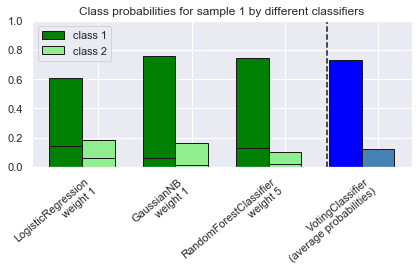

In [261]:
# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')
p5 = ax.bar(ind, np.hstack(([class3_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p6 = ax.bar(ind + width, np.hstack(([class4_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()

## Championship Title Fights using Annotated Line Graphs

The Formula One world Championship is held every year with multiple races taking place around the world. Points are awared to the drivers after each race weekend depending on their finishing order in the race. The driver with the most amount of points at the end of the season is crowned the world champion.

The title battle for the championship is ususally representated as a line chart with the cumulative points score over the season for each driver. While it is easy to find such charts for the recent seasons, it is interesting to plot them for some of the classic seasons when this wasn't done.

Let's try and do this for the 1988 season which is widely regarded as one of the best due to the contentious title fight between Ayrton Senna and Alain Prost.

We can sort the required data by using various pandas functions such as .loc, .sort_values, .cumsum() etc.

In [3]:
#Creating two new dataframes to represent the data for the respective drivers for 1988
senna=df1[(df1['driverref']=='senna')&(df1['year']==1988)].sort_values('raceid', ascending=False).reset_index()
prost=df1[(df1['driverref']=='prost')&(df1['year']==1988)].sort_values('raceid', ascending=False).reset_index()

#Adding a column for the cululative points
senna['total']=senna['points'].cumsum()
prost['total']=prost['points'].cumsum()

#Adding a column for the race name
senna['name']=df2.loc[df2['year']==1988][::-1].reset_index().name[::-1]
prost['name']=df2.loc[df2['year']==1988][::-1].reset_index().name[::-1]


After getting the points data for the 2 drivers; we can plot them using the `lineplot` function in seaborn.Then the graph has been cleaned by giving it labels, ticks, legends, markers etc.

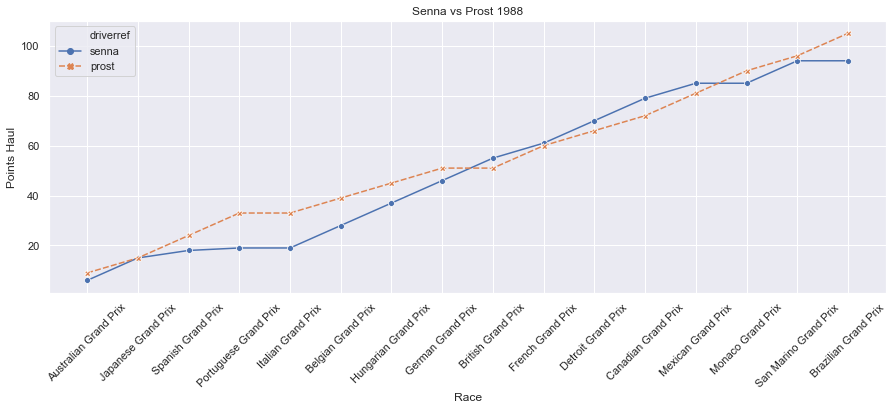

In [4]:
#Setting figure size and style
plt.figure(figsize=(15,5))
sb.set(style='darkgrid')

#Creating a new dataframe for the plot
svp=pd.concat([senna,prost], ignore_index=True)

#Creating Line Plot with labels and Title
senna_vs_prost=sb.lineplot(data=svp, hue='driverref', y='total', x='name', sort=False, style='driverref', markers=True)
plt.xlabel("Race")
plt.ylabel("Points Haul")
plt.setp(senna_vs_prost.get_xticklabels(),rotation=45)
plt.title("Senna vs Prost 1988")
plt.show()



We can see from the graph the point at which the title got away for Prost.

We can do the same thing for some other interesting title fights such as the 2016 season between Lewis Hamilton and Nico Rosberg and the 1976 season between James Hunt and Nikki Lauda. This lets us look at the effect of the difference in the points structure over the years

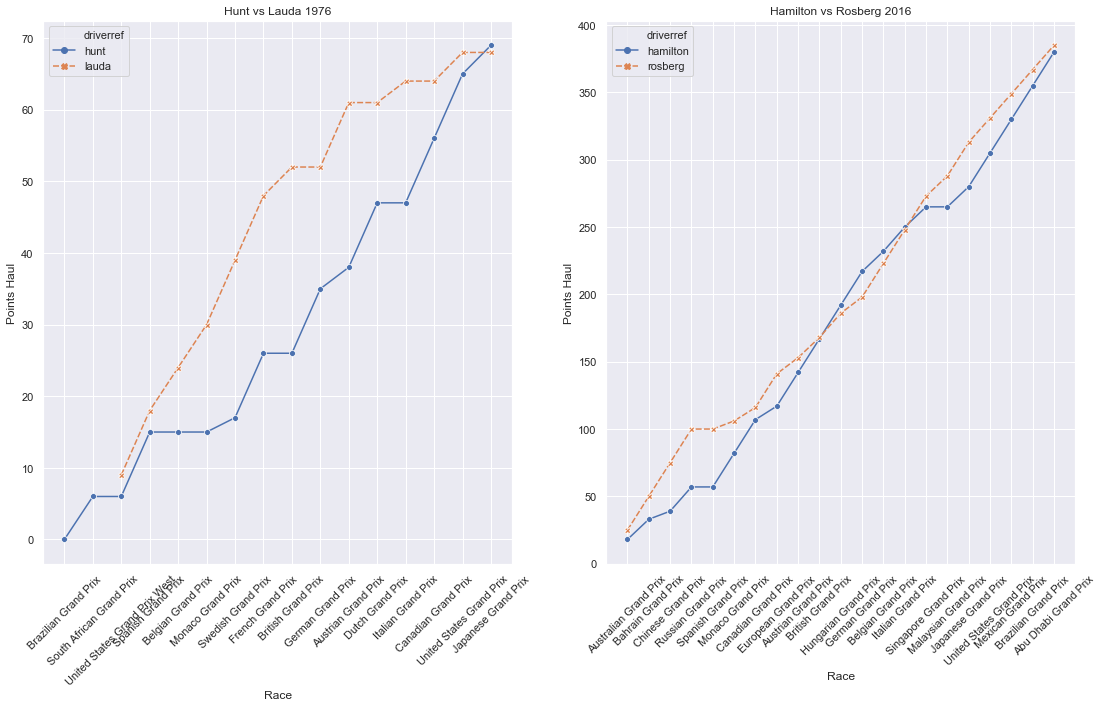

In [5]:
#Creating two new dataframes to represent the data for the respective drivers for 1976
hunt=df1[(df1['driverref']=='hunt')&(df1['year']==1976)].sort_values('raceid', ascending=False).reset_index()
lauda=df1[(df1['driverref']=='lauda')&(df1['year']==1976)].sort_values('raceid', ascending=False).reset_index()

#Adding a column for the cululative points
hunt=hunt.sort_values('raceid')
lauda=lauda.sort_values('raceid')
hunt['total']=hunt['points'].cumsum()
lauda['total']=lauda['points'].cumsum()

#Adding a column for the race name
hunt['name']=df2.loc[df2['year']==1976][::-1].reset_index().name[::-1]
lauda['name']=df2.loc[df2['year']==1976][::-1].reset_index().name[::-1]

#Creating two new dataframes to represent the data for the respective drivers for 2016
ham=df1[(df1['driverref']=='hamilton')&(df1['year']==2016)].sort_values('raceid', ascending=False).reset_index()
ros=df1[(df1['driverref']=='rosberg')&(df1['year']==2016)].sort_values('raceid', ascending=False).reset_index()

#Adding a column for the cululative points
ham=ham.sort_values('raceid')
ros=ros.sort_values('raceid')
ham['total']=ham['points'].cumsum()
ros['total']=ros['points'].cumsum()

#Adding a column for the race name
ham['name']=df2.loc[df2['year']==2016][::-1].reset_index().name[::-1]
ros['name']=df2.loc[df2['year']==2016][::-1].reset_index().name[::-1]



#Creating Line Plot with labels and Title
plt.subplot(1, 2, 1)

sb.set(style='darkgrid')
hvl=pd.concat([hunt,lauda], ignore_index=True)
hunt_vs_lauda=sb.lineplot(data=hvl, hue='driverref', y='total', x='name', sort=False, style='driverref', markers=True)
plt.xlabel("Race")
plt.ylabel("Points Haul")
plt.setp(hunt_vs_lauda.get_xticklabels(),rotation=45)
plt.title("Hunt vs Lauda 1976")



#Creating Line Plot with labels and Title
plt.subplot(1, 2, 2)

sb.set(style='darkgrid')
hvr=pd.concat([ham,ros], ignore_index=True)
ham_vs_ros=sb.lineplot(data=hvr, hue='driverref', y='total', x='name', sort=False, style='driverref', markers=True)
plt.xlabel("Race")
plt.ylabel("Points Haul")
plt.setp(ham_vs_ros.get_xticklabels(),rotation=45)
plt.title("Hamilton vs Rosberg 2016")

fig = plt.gcf()
fig.set_size_inches(18.5, 10)
plt.show()



## Racegrid distribution based on fastest lap pace using Violin plots

A common complain in F1 is that the gap between the top and bottom team has been widening over the years. The argument is that the copius sums of money the big teams such as Ferrari and Mercedes spend allow them to make a much faster car than some of the poorly funded teams such as Haas F1.

To examine this, we can make a violin chart with the fastest laptimes of the cars of these respective teams to study the distribution of times. We can compare the times over the past race seasons accross a circuit like Monaco which hasn't changed at all.

The results.csv(df1) file contains the information about all these races but to find the target races, we must first identify their raceid using the races.csv(df2) file. 

In [6]:
# Separating the Monaco Grand Prix for the desired years
df2.loc[(df2['year'].isin([2005,2007,2009, 2011, 2013, 2015, 2017, 2018, 2019]))&(df2['name']=='Monaco Grand Prix')].sort_values('year').reset_index()

,index,raceid,year,name
0,75,76,2005,Monaco Grand Prix
1,39,40,2007,Monaco Grand Prix
2,5,6,2009,Monaco Grand Prix
3,844,846,2011,Monaco Grand Prix
4,883,885,2013,Monaco Grand Prix
5,916,931,2015,Monaco Grand Prix
6,961,974,2017,Monaco Grand Prix
7,981,994,2018,Monaco Grand Prix
8,1002,1015,2019,Monaco Grand Prix


D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


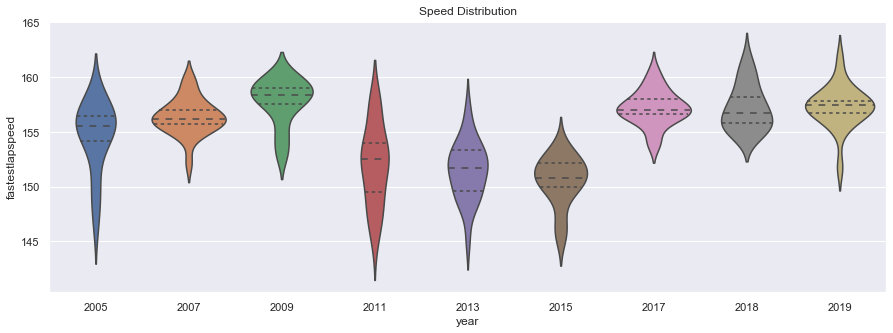

,raceid,driverid,points,fastestlapspeed,statusid,constructorid,year,driverref
0,76,8,10.0,158.375,1,1,2005,raikkonen
1,76,2,8.0,155.834,1,3,2005,heidfeld
2,76,17,6.0,156.214,1,3,2005,webber
3,76,4,5.0,156.971,1,4,2005,alonso
4,76,31,4.0,155.342,1,1,2005,montoya


In [27]:
# Creating a list to store the fastest lap data for each of these races as a dataframe
t=[]
for i in [76,40,6,846,885,931,974,994,1015]:
    
    m=df1.loc[(df1['raceid']==i)&(df1['fastestlapspeed']!='\\N')] # Removing blank entries
    
    m['fastestlapspeed']=m.fastestlapspeed.astype('float64') # Changing the type of the speed to float
    t.append(m)

#Creating a single dataframe for the violin plot
monaco=pd.concat(t, ignore_index=True)   

#Creating violin plot showing the speed distribution for each year
plt.figure(figsize=(15,5))
sb.set(style='darkgrid')
sb.violinplot(x='year',y='fastestlapspeed',data=monaco,inner="quartile")
plt.title('Speed Distribution')
plt.show()

monaco.head()

In [110]:
qu=[]
for i in [76,40,6,846,885,931,974,994,1015]:
    
    q=df4.loc[(df4['raceid']==846)]
    qu.append(q) 
q=q.reset_index()
q=q[0:9]
mq=pd.concat(qu, ignore_index=True)
mq

,raceid,driverid,position,q1,q3,q2
0,846,20,1,01:15.6,01:13.6,01:14.3
1,846,18,2,01:15.4,01:14.0,01:14.5
2,846,17,3,01:16.1,01:14.0,01:14.7
3,846,4,4,01:16.1,01:14.5,01:14.6
4,846,30,5,01:16.1,01:14.7,01:15.0
...,...,...,...,...,...,...
211,846,153,20,01:17.8,\N,\N
212,846,10,21,01:17.9,\N,\N
213,846,816,22,01:18.7,\N,\N
214,846,39,23,\N,\N,\N


In [105]:
qu=[]
for i in [76,40,6,846,885,931,974,994,1015]:
    
    q=df4.loc[(df4['raceid']==846)]
    qu.append(q) 
q=q.reset_index()
q=q[0:9]

q['q1'] = pd.to_datetime(q['q1'], format='%M:%S.%f')
q['q2'] = pd.to_datetime(q['q2'], format='%M:%S.%f')
q['q3'] = pd.to_datetime(q['q3'], format='%M:%S.%f')
#q['q1']=q['q1t'].dt.time
#q['q1ts'] = pd.to_timedelta(q['q1t'])
#q.assign(seconds=(q.q1t - q.q1t.dt.floor('D')).dt.total_seconds())
# q['Seconds'] = q['q1ts'].dt.total_seconds()
#q['newColumn'] = q['q1t'].total_seconds()
q['date'] = pd.date_range(start='1/1/1900', periods=len(q), end='1/1/1900')
q['diff'] = q['q1'] - q['date']
q['q1'] = q['diff'].dt.total_seconds()
q['diff'] = q['q2'] - q['date']
q['q2'] = q['diff'].dt.total_seconds()
q['diff'] = q['q3'] - q['date']
q['q3'] = q['diff'].dt.total_seconds()


X=q[['q1','q2','q3']]
X
#q['seconds'] = q['q1t'].dt.total_seconds()


,q1,q2,q3
0,75.6,74.3,73.6
1,75.4,74.5,74.0
2,76.1,74.7,74.0
3,76.1,74.6,74.5
4,76.1,75.0,74.7
5,76.3,74.6,74.9
6,75.2,74.3,75.3
7,75.9,74.7,75.8
8,75.8,75.5,76.5


As we can see, the variation between the fastest and slowest teams hasn't increased over the years and the claim is unfounded


We can also use the median line to see that the cars got quicker each season till the rule changes in 2009, 2014 and 2017.

## Retirements- Stacked Bar Plots


Reliability is a cruicial factor in F1. Besided crashing or colling, F1 cars can fail due to a variety of problems such as overheating, suspension damage, oil leaks and so on.

The various types of failures are detailed in the statusid.csv file (status.df)

A lot have fans and drivers have recently been complaining about the reliability of the new hybrid power units and arguing that the sport should go back to V12s of the 1990s due to their ruggedness.

We can look at the types of failures over to the decades (1950s to 2010s) to see how common each one is and draw some conclusions from it.


In [9]:
status

,statusid,Type
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
130,133,+49 Laps
131,134,+38 Laps
132,135,Brake duct
133,136,Seat


The failure types have been divied into four categories based on their id number-

1. Engine - Power Unit, Fuel, Oil, Radiators, etc
2. Transmission- Gearbox, Driveshaft, Clutch, Hydraulics
3. Electrical 
4. Mechanical - Suspension, Wheels, Tyres, Brakes, Steering

We can plot stacked bar graphs for each decade to see thier distribution

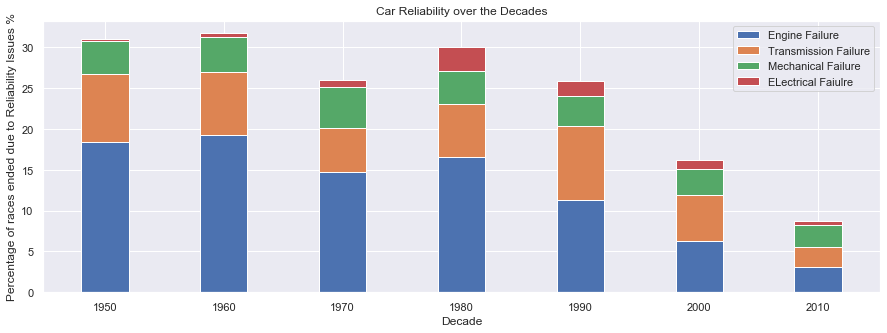

In [11]:
#Creating lists to calculate the number of failures for each type
total=[]
total=[]
retire=[]
engine=[]
transmission=[]
electrical=[]
mechanical=[]

#Going over the entire data (25,000 entries) by each decade to find the relavent instances of failure
for i in range(1950,2020,10):
    
    s=df1.loc[df1['year'].isin(range(i,i+10))]
    retire.append(len(s.loc[s['statusid'].isin([5,6,7,8,9,10,21,22,23,24,25,26,36,37,38,44,47,48,51,69,80,101,131])]))
    engine.append(len(s.loc[s['statusid'].isin([5,21,25,44,47,48,51,69,80,101,131])]))
    transmission.append(len(s.loc[s['statusid'].isin([6,7,8,9,24])]))
    electrical.append(len(s.loc[s['statusid'].isin([10])]))
    mechanical.append(len(s.loc[s['statusid'].isin([22,23,26,36,37,38])]))
    total.append(len(s))

#Calculating the percentage of each failure out of the total races run
engine_per = [i / j*100 for i, j in zip(engine, total)] 
transmission_per = [i / j*100 for i, j in zip(transmission, total)] 
mechanical_per = [i / j*100 for i, j in zip(mechanical, total)] 
electrical_per = [i / j*100 for i, j in zip(electrical, total)] 

#Creating a stacked bar plot for the various failure types
sb.set(style='darkgrid')
plt.figure(figsize=(15,5))
plt.bar(range(1950,2020,10),engine_per, width=4)
plt.bar(range(1950,2020,10),transmission_per,bottom=engine_per, width=4)
plt.bar(range(1950,2020,10),mechanical_per,bottom=[x + y for x, y in zip(engine_per, transmission_per)], width=4)
plt.bar(range(1950,2020,10),electrical_per,bottom=[x + y +z for x, y, z in zip(engine_per, transmission_per, mechanical_per)], width=4)
plt.legend(['Engine Failure','Transmission Failure','Mechanical Failure','ELectrical Faiulre'],loc=1)
plt.title('Car Reliability over the Decades')
plt.ylabel('Percentage of races ended due to Reliability Issues %')
plt.xlabel('Decade')
plt.show()

We can see that the reliability of the cars has increased over the decades as the percentage of failures has fallen from close to 33% in the 1950s to below 10% now.

Also the number of engine failures this decade has been much lower than the 1990s and therefore, this claim is also unfounded

To look at the evolution of the type of failure, we can normalize the data to create a percent stacked plot.

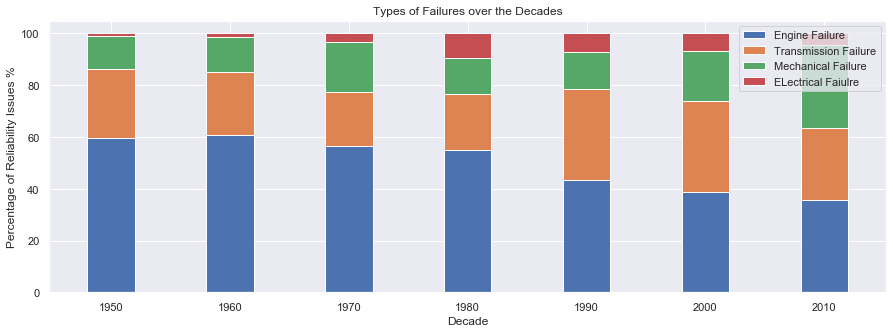

In [12]:
#Calculating the percentage of each failure type and normalizing it
engine_nor= [i / j*100 for i, j in zip(engine, retire)] 
transmission_nor = [i / j*100 for i, j in zip(transmission, retire)] 
mechanical_nor = [i / j*100 for i, j in zip(mechanical, retire)] 
electrical_nor = [i / j*100 for i, j in zip(electrical, retire)] 

#Creating a stacked bar plot
sb.set(style='darkgrid')
plt.figure(figsize=(15,5))
plt.bar(range(1950,2020,10),engine_nor, width=4)
plt.bar(range(1950,2020,10),transmission_nor,bottom=engine_nor, width=4)
plt.bar(range(1950,2020,10),mechanical_nor,bottom=[x + y for x, y in zip(engine_nor, transmission_nor)], width=4)
plt.bar(range(1950,2020,10),electrical_nor,bottom=[x + y +z for x, y, z in zip(engine_nor, transmission_nor, mechanical_nor)], width=4)
plt.legend(['Engine Failure','Transmission Failure','Mechanical Failure','ELectrical Faiulre'],loc=1)
plt.title('Types of Failures over the Decades')
plt.ylabel('Percentage of Reliability Issues %')
plt.xlabel('Decade')
plt.show()

As we can see, even the relative percentage of engine and transmission failures has gone down over the decades whereas the proprtion of electrical failures has increased as the cars have become more technical

## PitStop Times

Pitstops are a crucial way for teams to get an advantage over others by minimizing time. The pitstops.csv (df5) file contains the pitstop data for each pitstop ever made.

Let's compare the pitstops of Mclaren vs Willaims over the entire 2019 season 

In [13]:
df5

,raceid,driverid,stop,duration,year,driverref
0,841,153,1,26.898,2011,alguersuari
1,841,30,1,25.021,2011,michael_schumacher
2,841,17,1,23.426,2011,webber
3,841,4,1,23.251,2011,alonso
4,841,13,1,23.842,2011,massa
...,...,...,...,...,...,...
7302,1026,815,2,23.301,2019,perez
7303,1026,1,2,23.591,2019,hamilton
7304,1026,844,3,23.28,2019,leclerc
7305,1026,825,2,23.973,2019,kevin_magnussen


D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda New\envs\b\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

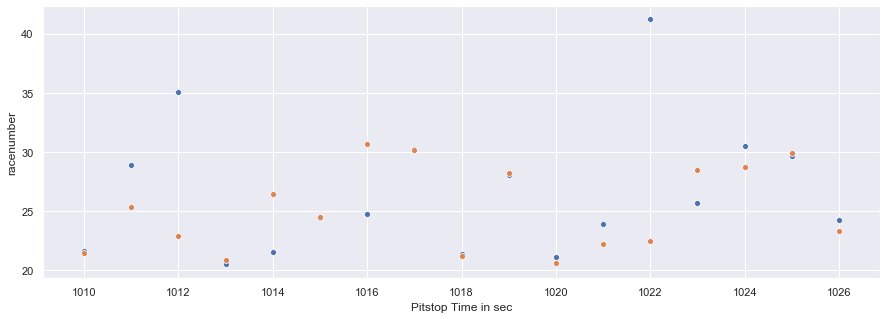

In [14]:
#Correcting data types
df5['year'] = df5['year'].astype(np.float64)

#Creating the dataframe for the McLaren drivers (832 and 846)
df51=df5.loc[(df5['year']==2019)&(df5['driverid'].isin([832,846]))]
#Creating the dataframe for the Williams drivers (832 and 846)
df52=df5.loc[(df5['year']==2019)&(df5['driverid'].isin([830,848]))]

#Correcting data types
df51['duration'] = df51['duration'].astype(np.float64)
df52['duration'] = df52['duration'].astype(np.float64)

plt.figure(figsize=(15,5))
sb.scatterplot(data=df51.groupby('raceid').mean().duration)
sb.scatterplot(data=df52.groupby('raceid').mean().duration)
plt.xlabel('Pitstop Time in sec')
plt.ylabel('racenumber')
plt.show()





We can see that McLaren (orange) and Williams (Blue) have been neck and neck over the season

## Summary and references

This tutorial highlighted just a few elements of what is possible with tabular data analyzed for sports statistics in Python.  Much more detail about the libraries and questions on Seaborn are available from the following links.

1. Seaborn: https://seaborn.pydata.org
2. Other Graphs: https://python-graph-gallery.com
3. Formula one Data: https://formula1.com
